<a href="https://colab.research.google.com/github/lyloc-logtech/ai-code/blob/main/nhandienkhuonmat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/drive-download-20250414T061518Z-001/face train'
img_width, img_height = 128,128
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_width, img_height),batch_size=batch_size,class_mode='categorical')

model = Sequential([Conv2D(32, (3,3), activation='relu', input_shape = (img_width, img_height, 3)),MaxPooling2D((2,2)),Conv2D(64, (3,3), activation='relu'),MaxPooling2D((2,2)),Conv2D(128, (3,3), activation='relu'),MaxPooling2D((2,2)),Flatten(),Dense(256, activation='relu'),Dense(128, activation='relu'),Dense(5, activation='softmax')])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, epochs=50)
model.save('dang_mat.keras')

Found 27 images belonging to 5 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2593 - loss: 1.6183
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2593 - loss: 1.8389
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2222 - loss: 1.7155
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2593 - loss: 1.6112
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2963 - loss: 1.6071
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2593 - loss: 1.6033
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2593 - loss: 1.5999
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2593 - loss: 1.5934
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2593 - loss: 1.5921
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2593 - loss: 1.5841
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2593 - loss: 1.5769
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2593 - loss: 1.5679
Epoch 13/50
1/1 ━━━━━━━━━

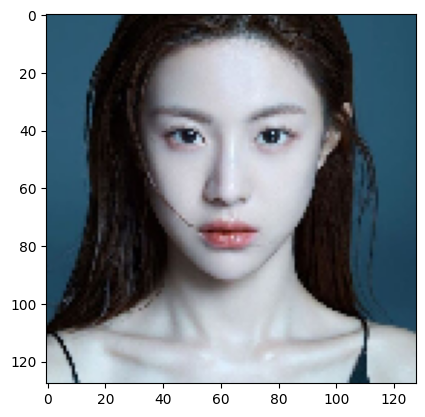

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
{'dạng_mặt:diamon'}


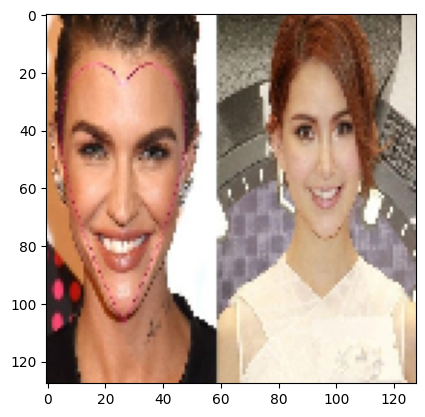

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
{'dạng_mặt:heart'}


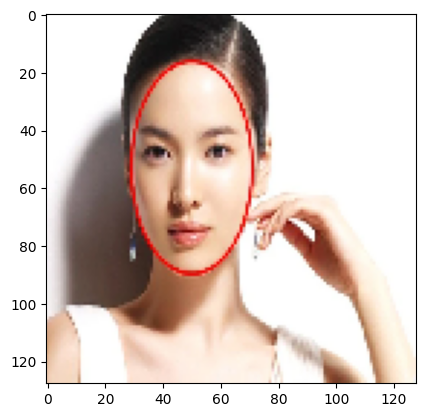

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
{'dạng_mặt:oval'}


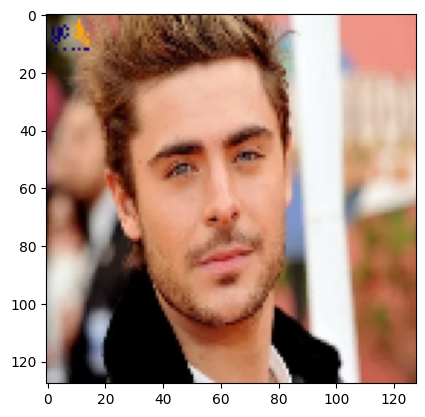

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
{'dạng_mặt:square'}


In [7]:
from keras.utils import load_img
import numpy as np
paths= ('/content/drive/MyDrive/drive-download-20250414T061518Z-001/face train/diamon/3.jpg',
        '/content/drive/MyDrive/drive-download-20250414T061518Z-001/face train/heart/1.jpg',
        '/content/drive/MyDrive/drive-download-20250414T061518Z-001/face train/oval/2.webp',
        '/content/drive/MyDrive/drive-download-20250414T061518Z-001/face train/square/3.jpg')
for image_path in paths:
  img = load_img(image_path, target_size=(128,128))
  plt.imshow(img)
  plt.show()
  img_array= np.array(img)
  img_array= img_array.reshape((1,128,128,3))
  prediction= np.argmax(model.predict(img_array))
  class_labels={v:k for k,v in train_generator.class_indices.items()}
  food_name= class_labels[prediction]
  print({f'dạng_mặt:{food_name}'})